In [2]:
# Support Vector Machine
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
cell_df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
print("shape : \n",cell_df.shape)
print("\n 1st 5 rows :\n",cell_df.head())
print("\n last 5 rows : \n",cell_df.tail())
print("\n each cell count \n",cell_df.count())
print(cell_df['Purchased'].value_counts())
print(cell_df.dtypes)

shape : 
 (400, 5)

 1st 5 rows :
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

 last 5 rows : 
       User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

 each cell count 
 User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64
0    257
1    143
Name: Purchased, dtype: int64
User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

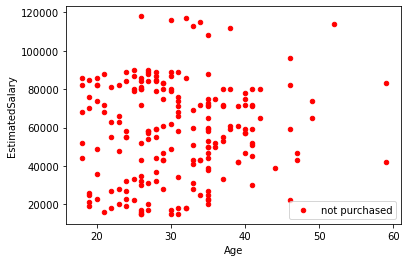

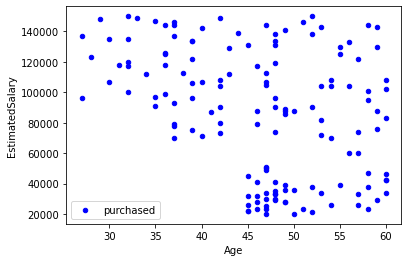

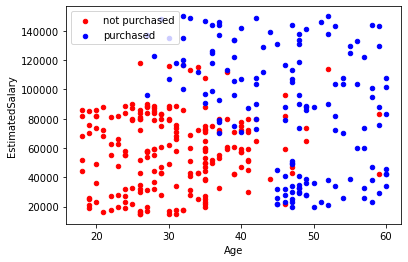

In [5]:
no_df = cell_df[cell_df['Purchased']==0][0:200]
yes_df = cell_df[cell_df['Purchased']==1][0:200]

#help(age_df.plot)

no_df.plot(kind='scatter', x='Age', y='EstimatedSalary', color='red', label='not purchased')
yes_df.plot(kind='scatter', x='Age', y='EstimatedSalary', color='blue', label='purchased')


axes = no_df.plot(kind='scatter', x='Age', y='EstimatedSalary', color='red', label='not purchased')

yes_df.plot(kind='scatter', x='Age', y='EstimatedSalary', color='blue', label='purchased', ax=axes)

 converting the non-numerical to numerical column

In [6]:
cell_df['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
cell_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


remove unwanted column

In [7]:
print("total cells before :\n",cell_df.columns)
feature_df = cell_df[[ 'Gender' , 'Age', 'EstimatedSalary']]  #'Gender',
print("\ntotal cells after :\n",feature_df.columns)

total cells before :
 Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

total cells after :
 Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')


In [8]:
#independent variables
x= np.asarray(feature_df)

#dependent variables 
y= np.asarray(cell_df['Purchased'])

#print 
print("x : \n",x[0:5])
print("y : \n",y[0:5])

x : 
 [[    1    19 19000]
 [    1    35 20000]
 [    0    26 43000]
 [    0    27 57000]
 [    1    19 76000]]
y : 
 [0 0 0 0 0]


# dividing the data into train/test data

In [9]:
'''
cell_df(10 rows) --> train(8 rows) + test(2 rows)
train(x,y) --> x is 2d array and y is 1d array
test(x,y)
'''

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)


print("x_train rows and cols :",x_train.shape)
print("x_test rows and cols :",x_test.shape)
print("y_train rows and cols :",y_train.shape)
print("y_test rows and cols :",y_test.shape)

x_train rows and cols : (320, 3)
x_test rows and cols : (80, 3)
y_train rows and cols : (320,)
y_test rows and cols : (80,)


In [10]:
print(x_train[0:5])

[[     0     36  50000]
 [     1     35 108000]
 [     1     39 122000]
 [     1     30  17000]
 [     0     32  86000]]


# Creating SVM Model from sklearn

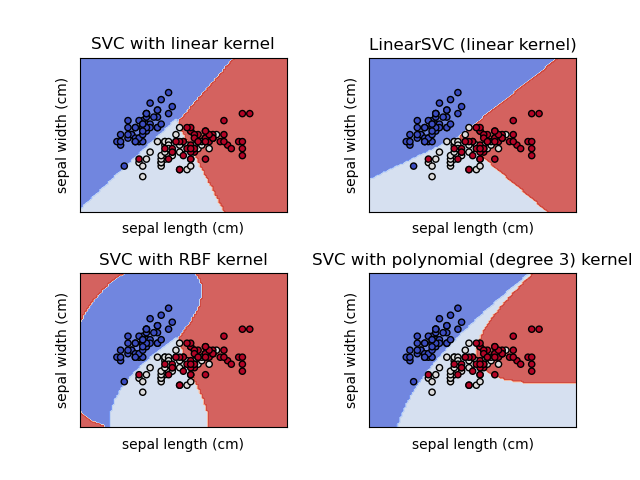

In [11]:
from sklearn import svm

#SVC = support vector classifer

classifier = svm.SVC(kernel='linear', gamma = 'auto', C = 2)
#c is the penalty imposed on the incorrectly places datapoints


# training the data 

In [12]:
classifier.fit(x_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

# testing the data

In [13]:
y_pred = classifier.predict(x_test)

# result

In [14]:
from sklearn import metrics
print("accuracy score with linear kernel :")
print(metrics.accuracy_score(y_test,y_pred))

accuracy score with linear kernel :
0.8875


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        59
           1       0.77      0.81      0.79        21

    accuracy                           0.89        80
   macro avg       0.85      0.86      0.86        80
weighted avg       0.89      0.89      0.89        80

